In [92]:
import numpy as np
import torchvision
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
import pickle
import torch
import matplotlib.pylab as plt
%matplotlib inline

path_to_data = '../data/'
train_data_file = 'data_train.pickle'
test_data_file = 'data_test_no_labels.pickle'


In [93]:
# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root=path_to_data,
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root=path_to_data,
                                            train=False, 
                                            transform=transforms.ToTensor())

Files already downloaded and verified


In [94]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=1, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=1, 
                                          shuffle=False)

In [95]:
def loader2pickle(loader, filename):
    imgs = []
    labels = []
    for img, y in train_loader:
        n_img = np.uint8(np.array(img[0]) * 255)
        n_y = np.array(y[0]).ravel()
        n_img = n_img.transpose((1, 2, 0))
        imgs.append(n_img)
        labels.append(n_y)
        
    imgs = np.array(imgs)
    labels = np.array(labels)
    res = {'data' : imgs, 'target' : labels}
    with open(filename, 'wb') as f:
        pickle.dump(res, f)

In [96]:
loader2pickle(train_loader, path_to_data + train_data_file)
loader2pickle(test_loader, path_to_data + test_data_file)

In [97]:
data = None
with open(path_to_data + train_data_file,'rb') as fin:
    data = pickle.load(fin)

X = data['data']
y = data['target']
X.shape

(50000, 32, 32, 3)

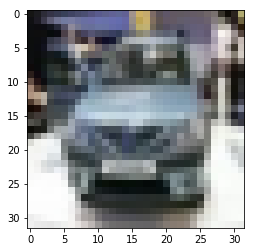

In [99]:
from PIL import Image
img = X[1]
plt.imshow(img)

In [103]:
im = Image.fromarray(img)

In [104]:
im.show()